In [2]:
# going to practice clustering, using spacy
import spacy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
train_df = pd.read_csv("data/processed_train.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
nlp = spacy.load("en_core_web_md")

In [6]:
doc = nlp("The cat ate the dog")

In [7]:
# for entry in df.text:


In [8]:
doc

The cat ate the dog

In [9]:
short_df = df.loc[0:5]

NameError: name 'df' is not defined

In [11]:
def vectorize(item):
    doc = nlp(item)
    return doc.vector

In [12]:
def reduce_dims(train, test):
    '''
    Take in a df and reduce the dimensions to 2.
    
    train -- (pd.DataFrame) - doc vector array for training set
    test -- (pd.DataFrame) - doc vector array for test set
    '''
    pca = PCA(n_components = 2)
    transformed_X_train = pca.fit_transform(train)
    transformed_X_test = pca.transform(test)
    return pd.DataFrame(transformed_X_train, columns = ["x1", "y1"]), pd.DataFrame(transformed_X_test, columns = ["x1", "y1"])

In [13]:
#Get document vectors
train_vector = pd.DataFrame(np.vstack([vectorize(entry) for entry in train_df.text]))

In [14]:
test_vector = pd.DataFrame(np.vstack([vectorize(entry) for entry in test_df.text]))

In [15]:
# Reduce dimensions of train and test 
train_reduced, test_reduced = reduce_dims(train_vector, test_vector)

In [16]:
final_train_df = pd.concat([train_df, train_reduced], axis = 1)

In [17]:
final_test_df = pd.concat([test_df, test_reduced], axis = 1)

In [18]:
# reduced_df = pd.concat([short_df, pd.DataFrame(X2, columns = ["x1", "y1"])], axis = 1)

In [19]:
# reduced_df

In [20]:
final_train_df.head()

,id,keyword,location,text,target,x1,y1
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,-0.422296,-0.346061
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.887376,-0.228196
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,-0.278778,-0.898830
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.651418,-0.766114
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.100373,-0.093099


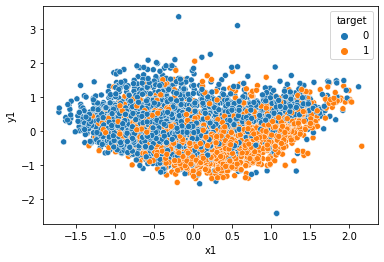

In [22]:
sns.scatterplot(data = final_train_df, x = "x1", y = "y1", hue = 'target')

Honestly, not a bad result! WE can see at least some separation between the two entities.

In [165]:
#Test some models
train = pd.read_csv("data/train.csv")

In [166]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [176]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


In [177]:
X_train, X_test, y_train, y_test = train_test_split(train[['text']], 
                                                    train[['target']], 
                                                    test_size = 0.2, 
                                                    random_state = 22)

In [178]:
X_train.reset_index().drop(columns = 'index')

,text
0,Newberg upheaval: Jacque Betz responds 'lookin...
1,One Direction Is my pick for http://t.co/iMHFd...
2,Untangle yourself from requiring your partner ...
3,I'm a disaster?? https://t.co/VCV73BUaCZ
4,For maximum damage! Activate [BIG BAND MODE] f...
...,...
6085,But if you build an army of 100 dogs and their...
6086,I don't understand 'taking' ANY life as a trop...
6087,@nataliealund \nParents of Colorado theater sh...
6088,New item: Pillow Covers ANY SIZE Pillow Cover ...


In [179]:
train_vector = np.vstack([vectorize(entry) for entry in X_train.text])

In [180]:
test_vector = np.vstack([vectorize(entry) for entry in X_test.text])

In [181]:
scaler = StandardScaler()

In [182]:
train_vector = pd.DataFrame(scaler.fit_transform(train_vector))
test_vector = pd.DataFrame(scaler.transform(test_vector))

In [183]:
train_vector

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.258586,0.954761,-0.687861,0.229638,1.360980,0.302637,0.654241,0.358151,0.355853,-0.754964,...,2.372779,-0.003444,0.115043,0.346336,0.729668,-1.048965,-0.277087,-0.518382,-0.541822,0.043117
1,1.202488,-0.144236,0.508134,0.498147,0.754063,0.047899,0.631751,-0.318927,0.473545,-0.631304,...,0.877806,-0.414987,-0.025682,0.341421,0.182109,-0.607925,0.441017,-0.091702,-2.020091,-0.285953
2,0.607607,0.124913,-1.368353,1.498479,0.240222,-0.073259,-0.100398,0.270908,0.424765,0.617001,...,0.054232,0.000800,-0.410967,0.557810,0.122299,-0.698994,0.848359,0.738116,0.690554,-0.235315
3,0.103522,-0.220200,-0.070220,-0.630333,0.141289,-0.732470,1.297340,-1.822003,-0.480689,0.155326,...,0.557180,0.771838,0.505567,-0.514896,1.849653,0.222512,-0.443766,0.001460,0.106908,0.998579
4,-1.695998,0.419652,-0.587327,-0.072714,-0.922259,-1.057159,-0.221302,-0.156537,-0.876093,-0.722849,...,-1.251230,-0.191243,0.299136,1.017813,-0.527692,1.197291,0.090007,1.003828,-1.175620,-0.367987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,-0.735385,-0.340383,0.093815,-0.668528,-0.136507,-0.130834,-0.481044,0.069705,1.026792,1.421142,...,-1.110183,-0.672870,-1.322137,-0.274247,-1.631270,2.395099,0.897499,-0.642938,1.014987,-0.662489
6086,-1.190153,1.094975,-0.045520,-0.139094,0.656081,0.213304,1.271404,-0.039468,-0.711014,0.047042,...,0.618979,-0.200718,-0.971235,0.171165,0.543731,-0.042921,-1.606120,-0.155343,-0.155105,-0.882833
6087,0.188159,-0.657791,0.794387,-0.221053,0.947134,-0.656094,1.059074,0.719913,0.689317,-1.045129,...,0.170458,0.281923,-0.430597,1.456765,0.021244,0.000420,-0.825116,-0.491899,-0.401499,-0.166269
6088,1.364862,-1.054759,-0.682683,-0.175248,-1.469928,-1.867403,-0.814707,-1.052260,-3.269715,-1.942532,...,-0.506105,0.026805,1.589322,-1.130861,-1.242141,-0.870873,-0.402015,0.884736,0.774420,-0.402201


In [184]:
X_train_final = pd.concat([X_train.reset_index().drop(columns = 'index'), train_vector], axis =1)

In [185]:
X_test_final = pd.concat([X_test.reset_index().drop(columns = 'index'), test_vector], axis = 1)

In [186]:
X_train_final

,text,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,Newberg upheaval: Jacque Betz responds 'lookin...,-0.258586,0.954761,-0.687861,0.229638,1.360980,0.302637,0.654241,0.358151,0.355853,...,2.372779,-0.003444,0.115043,0.346336,0.729668,-1.048965,-0.277087,-0.518382,-0.541822,0.043117
1,One Direction Is my pick for http://t.co/iMHFd...,1.202488,-0.144236,0.508134,0.498147,0.754063,0.047899,0.631751,-0.318927,0.473545,...,0.877806,-0.414987,-0.025682,0.341421,0.182109,-0.607925,0.441017,-0.091702,-2.020091,-0.285953
2,Untangle yourself from requiring your partner ...,0.607607,0.124913,-1.368353,1.498479,0.240222,-0.073259,-0.100398,0.270908,0.424765,...,0.054232,0.000800,-0.410967,0.557810,0.122299,-0.698994,0.848359,0.738116,0.690554,-0.235315
3,I'm a disaster?? https://t.co/VCV73BUaCZ,0.103522,-0.220200,-0.070220,-0.630333,0.141289,-0.732470,1.297340,-1.822003,-0.480689,...,0.557180,0.771838,0.505567,-0.514896,1.849653,0.222512,-0.443766,0.001460,0.106908,0.998579
4,For maximum damage! Activate [BIG BAND MODE] f...,-1.695998,0.419652,-0.587327,-0.072714,-0.922259,-1.057159,-0.221302,-0.156537,-0.876093,...,-1.251230,-0.191243,0.299136,1.017813,-0.527692,1.197291,0.090007,1.003828,-1.175620,-0.367987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,But if you build an army of 100 dogs and their...,-0.735385,-0.340383,0.093815,-0.668528,-0.136507,-0.130834,-0.481044,0.069705,1.026792,...,-1.110183,-0.672870,-1.322137,-0.274247,-1.631270,2.395099,0.897499,-0.642938,1.014987,-0.662489
6086,I don't understand 'taking' ANY life as a trop...,-1.190153,1.094975,-0.045520,-0.139094,0.656081,0.213304,1.271404,-0.039468,-0.711014,...,0.618979,-0.200718,-0.971235,0.171165,0.543731,-0.042921,-1.606120,-0.155343,-0.155105,-0.882833
6087,@nataliealund \nParents of Colorado theater sh...,0.188159,-0.657791,0.794387,-0.221053,0.947134,-0.656094,1.059074,0.719913,0.689317,...,0.170458,0.281923,-0.430597,1.456765,0.021244,0.000420,-0.825116,-0.491899,-0.401499,-0.166269
6088,New item: Pillow Covers ANY SIZE Pillow Cover ...,1.364862,-1.054759,-0.682683,-0.175248,-1.469928,-1.867403,-0.814707,-1.052260,-3.269715,...,-0.506105,0.026805,1.589322,-1.130861,-1.242141,-0.870873,-0.402015,0.884736,0.774420,-0.402201


In [187]:
dummy = DummyClassifier()

In [190]:
dummy.fit(X_train_final.drop(columns = 'text'), y_train)
y_pred = dummy.predict(X_test_final)

In [191]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [192]:
f1_score(y_test, y_pred)

0.40797546012269936

In [195]:
lr_model = LogisticRegression(max_iter = 500)
lr_model.fit(X_train_final.drop(columns = ['text']), y_train.to_numpy().ravel())

LogisticRegression(max_iter=500)

In [196]:
y_train_pred = lr_model.predict(X_train_final.drop(columns = 'text'))
y_test_pred = lr_model.predict(X_test_final.drop(columns = 'text'))

In [197]:
f1_score(y_train, y_train_pred)

0.7901626338754463

In [198]:
f1_score(y_test, y_test_pred)

0.7354627354627354

This was just a hand wavy test but we do see that using doc vectors helps in distinguishing between disaster and non-disaster tweets. 